In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('final_dataset.csv', index_col=[0])

In [31]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to C:\Users\Nina
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Nina
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [32]:
word_dict = {"fast fashion":-1, "second hand":1, "landfill":-1, "consumed":-1, "garbage":-1, 
             "greenwashing":-1, "eco":1, "sustainable":1,"transparent":1, "green":1, "gives away":1,
            "sustainable development":1}

sid.lexicon.update(word_dict)

list1 = []
for i in df['cleaned_tweet']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [33]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [34]:
df = df[['tweet','date','id','hashtags','nlikes','nretweets','nreplies','Company','cleaned_tweet','sentiment','sentiment_category']]

In [35]:

df.head()

,tweet,date,id,hashtags,nlikes,nretweets,nreplies,Company,cleaned_tweet,sentiment,sentiment_category
0,Can you imagine a tile inspired by the ocean? ...,2022-11-25 18:33:45,1596210549095809025,"['tile', 'ocean', 'species', 'sustainability',...",5,0,0,Zara,can you imagine a tile inspired by the ocean ...,0.5994,positive
1,"A story in 4 parts. @CosmopolitanUK, “sustaina...",2022-11-20 23:04:07,1594466648026644480,['sustainablefashion'],1,0,1,Zara,a story in parts sustainable fashion and zar...,0.3182,positive
2,TRENDING VIDEO: #Inditex ( Zara ) Customer Foc...,2022-11-20 19:01:16,1594405532948799488,"['inditex', 'retail', 'innovation', 'leadershi...",0,0,0,Zara,trending video zara customer focused innova...,0.7506,positive
3,Fashion giants and the challenge of #sustainab...,2022-11-16 15:06:22,1592896868518068226,"['sustainability', 'supplychains']",0,1,0,Zara,fashion giants and the challenge of across ...,0.0772,positive
4,🔄 Midweek Transformation! 🔄 Floaty print dress...,2022-11-16 13:19:31,1592869978784821249,"['tuesdaytransformation', 'thezipyard', 'ootd'...",0,0,0,Zara,midweek transformation floaty print dress fro...,0.0000,neutral


In [36]:
import nest_asyncio
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [37]:
import ast #optional
from collections import Counter

import cufflinks as cf
from plotly.offline import init_notebook_mode #, plot, iplot, download_plotlyjs
init_notebook_mode(connected = True)
cf.go_offline()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
sns.set_theme()
pal = {"Zara":'r', "Gucci":'g',"Patagonia":"b"}

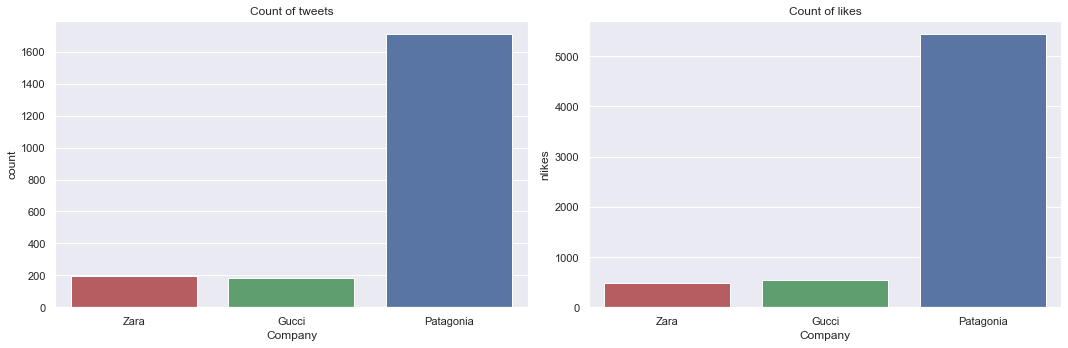

In [39]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(ax=ax[0], x=df["Company"], palette=pal)
ax[0].set_title("Count of tweets")

sns.barplot(data=df, x="Company", y="nlikes", estimator=np.sum, ci=None, palette=pal)
ax[1].set_title("Count of likes")

plt.tight_layout()

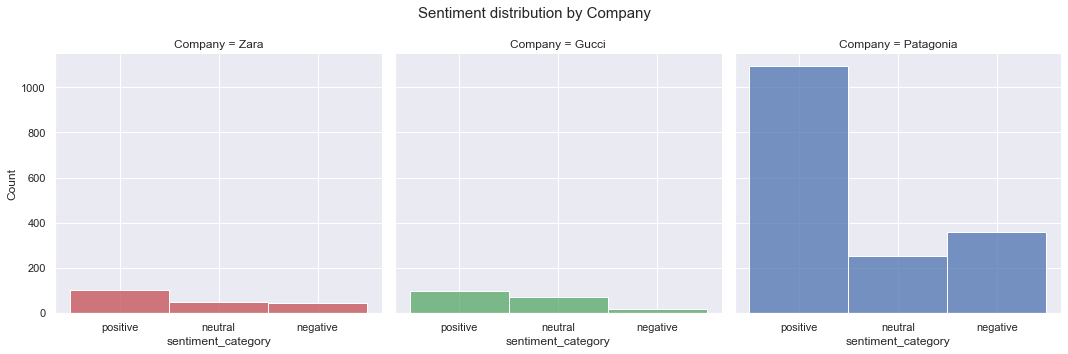

In [40]:
fig1 = sns.displot(df, x="sentiment_category", col="Company", col_wrap= 3, hue="Company", legend=False, palette= pal)
fig1.fig.suptitle("Sentiment distribution by Company",fontsize =15)

plt.tight_layout()
plt.show()

In [41]:
df_sum = df.groupby('Company').mean()

In [42]:
df_sum

,id,nlikes,nretweets,nreplies,sentiment
Company,,,,,
Gucci,1.544926e+18,2.972973,0.562162,0.302703,0.227795
Patagonia,1.562516e+18,3.179637,1.202458,0.273259,0.289451
Zara,1.541923e+18,2.459184,0.979592,0.153061,0.177075


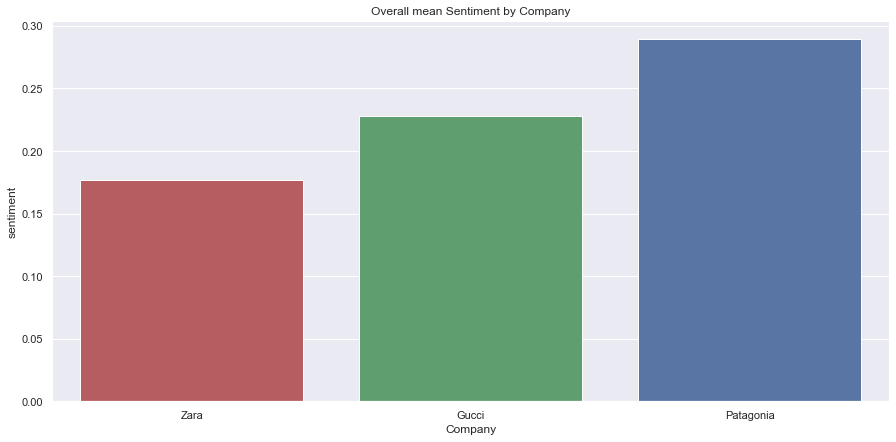

In [43]:
plt.figure(figsize=(15,7))
plt.title("Overall mean Sentiment by Company")
sns.barplot(data=df, x="Company",y="sentiment", palette=pal, ci=False)
plt.show()


In [44]:
Zara_df = df[(df.Company=="Zara")]
Patagonia_df = df[(df.Company=="Patagonia")]
Gucci_df = df[(df.Company=="Gucci")]

In [45]:
(Zara_df.groupby('sentiment_category').size()/Zara_df['sentiment_category'].count())*100

sentiment_category
negative    22.959184
neutral     24.489796
positive    52.551020
dtype: float64

In [46]:
(Patagonia_df.groupby('sentiment_category').size()/Patagonia_df['sentiment_category'].count())*100

sentiment_category
negative    21.064950
neutral     14.921006
positive    64.014043
dtype: float64

In [47]:
(Gucci_df.groupby('sentiment_category').size()/Gucci_df['sentiment_category'].count())*100

sentiment_category
negative     9.729730
neutral     37.837838
positive    52.432432
dtype: float64

In [48]:
def hashlist(df):
    hashlist = []
    for i in df['hashtags']:
        hashlist.extend(ast.literal_eval(i))
    return hashlist

In [49]:
df['hashtags2'] = df['hashtags'].astype(str)

In [50]:
hash_Zara = pd.DataFrame(Counter(hashlist(Zara_df)).items()).sort_values(1,ascending=False)
hash_Gucci = pd.DataFrame(Counter(hashlist(Gucci_df)).items()).sort_values(1,ascending=False)
hash_Patagonia = pd.DataFrame(Counter(hashlist(Patagonia_df)).items()).sort_values(1,ascending=False)

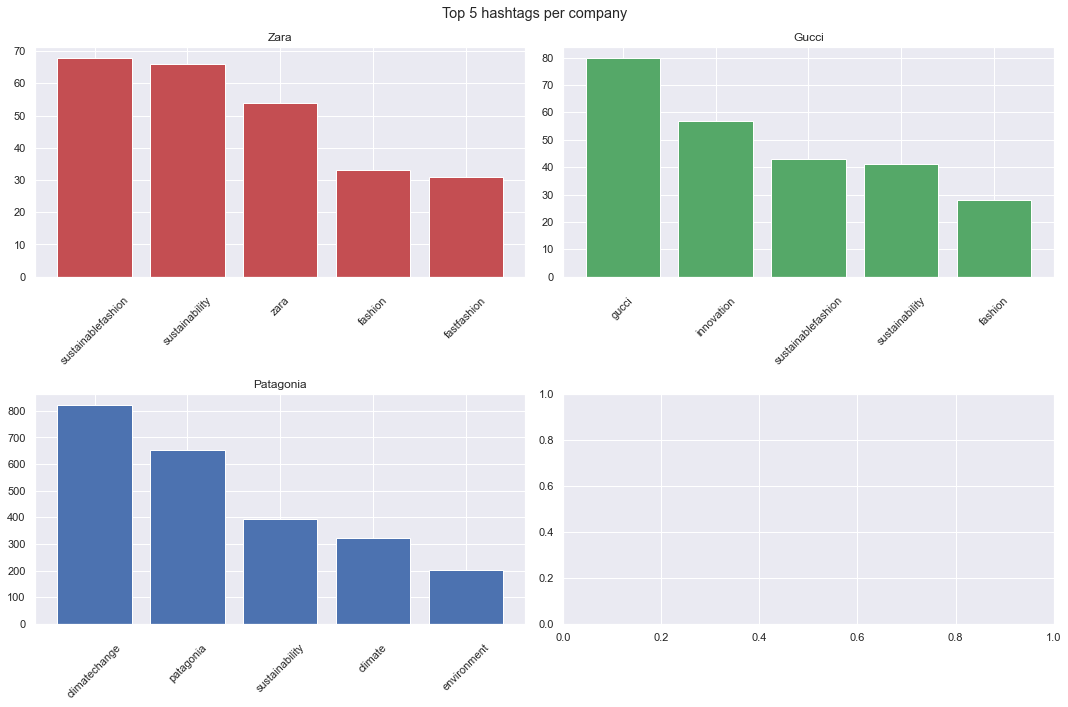

In [51]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))

plt.suptitle("Top 5 hashtags per company")


ax[0,0].bar(hash_Zara[0].head(5), hash_Zara[1].head(5), color = "r")
ax[0,0].set_title("Zara")
ax[0,0].xaxis.set_tick_params(rotation=45, size = 15)

ax[0,1].bar(hash_Gucci[0].head(5), hash_Gucci[1].head(5), color = "g")
ax[0,1].set_title("Gucci")
ax[0,1].xaxis.set_tick_params(rotation=45, size = 15)

ax[1,0].bar(hash_Patagonia[0].head(5), hash_Patagonia[1].head(5), color = "b")
ax[1,0].set_title("Patagonia")
ax[1,0].xaxis.set_tick_params(rotation=45, size = 15)

plt.tight_layout()
plt.show()

In [52]:
tweetString_z = " ".join(list(Zara_df["cleaned_tweet"])).lower()
tweetString_g = " ".join(list(Gucci_df["cleaned_tweet"])).lower()
tweetString_p = " ".join(list(Patagonia_df["cleaned_tweet"])).lower()

In [53]:
from wordcloud import WordCloud

In [54]:
tweetString_z = re.sub(r"Zara|ZARA|amp","",tweetString_z)
wordcloud_z = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(tweetString_z)

tweetString_g = re.sub(r"Gucci|GUCCI|amp","",tweetString_g)   
wordcloud_g = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_g)

tweetString_p = re.sub(r"Patagonia|PATAGONIA|amp","",tweetString_p)     
wordcloud_p = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_p)

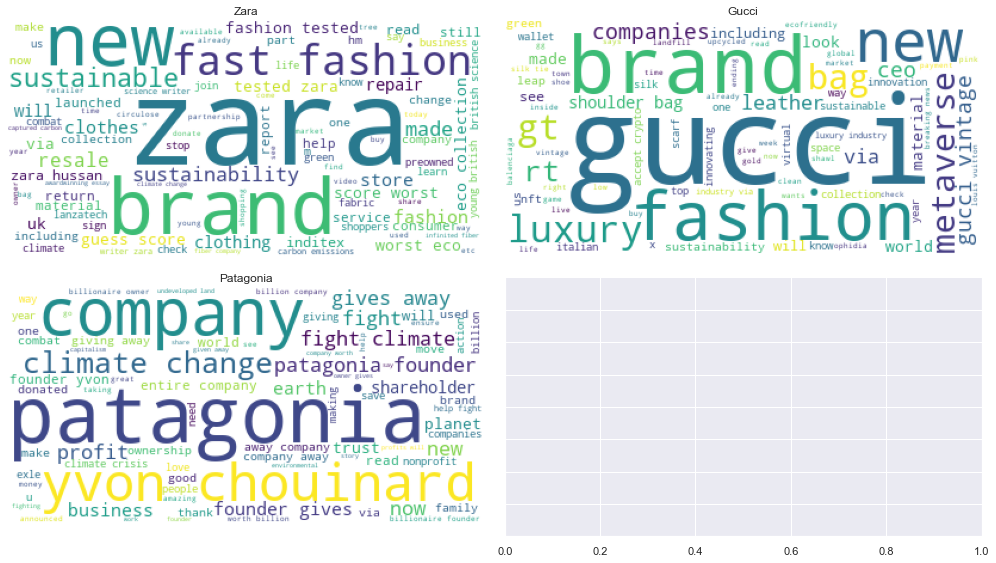

In [55]:
fig, ax = plt.subplots(2,2,figsize=(14, 8),sharey=True)

ax[0,0].imshow(wordcloud_z)
ax[0,1].imshow(wordcloud_g)
ax[1,0].imshow(wordcloud_p)


ax[0,0].axis("off")
ax[0,1].axis("off")
ax[1,0].axis("off")


ax[0,0].set_title("Zara")
ax[0,1].set_title("Gucci")
ax[1,0].set_title("Patagonia")


plt.tight_layout() 
plt.show()

In [56]:
df_neg = df.loc[df['sentiment_category']=='negative']

In [57]:
Zara_df_neg = df_neg[(df_neg.Company=="Zara")]
Gucci_df_neg = df_neg[(df_neg.Company=="Gucci")]
Patagonia_df_neg = df_neg[(df_neg.Company=="Patagonia")]

In [58]:
String_z = " ".join(list(Zara_df_neg["cleaned_tweet"])).lower()
String_g = " ".join(list(Gucci_df_neg["cleaned_tweet"])).lower()
String_p = " ".join(list(Patagonia_df_neg["cleaned_tweet"])).lower()

In [59]:
String_z = re.sub(r"Zara|ZARA|amp","",String_z)
wordcloud_z2 = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(String_z)

String_g = re.sub(r"Gucci|GUCCI|amp","",String_g)   
wordcloud_g2 = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(String_g)

String_p = re.sub(r"Patagonia|PATAGONIA|amp","",String_p)     
wordcloud_p2 = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(String_p)

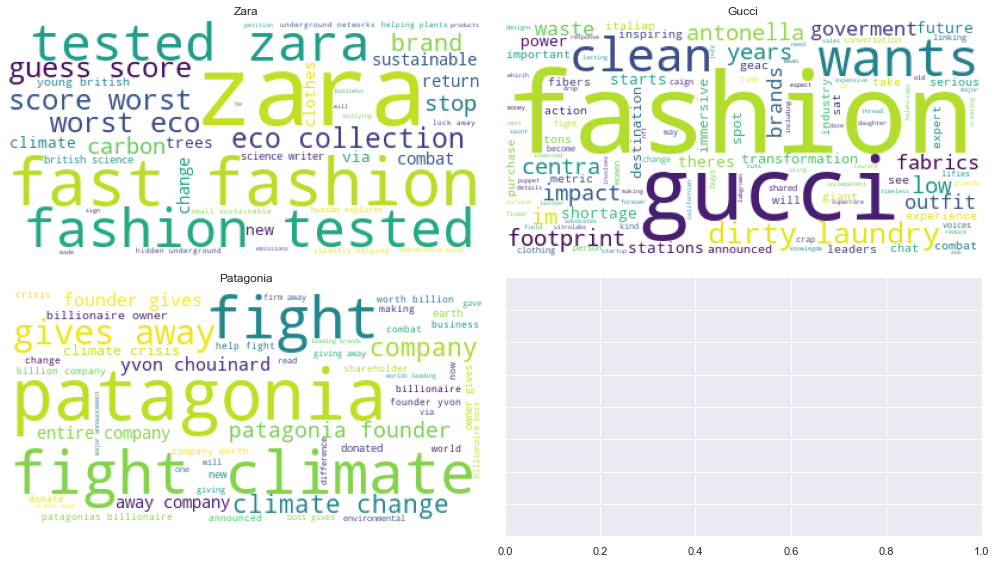

In [60]:
fig, ax = plt.subplots(2,2,figsize=(14, 8),sharey=True)

ax[0,0].imshow(wordcloud_z2)
ax[0,1].imshow(wordcloud_g2)
ax[1,0].imshow(wordcloud_p2)


ax[0,0].axis("off")
ax[0,1].axis("off")
ax[1,0].axis("off")


ax[0,0].set_title("Zara")
ax[0,1].set_title("Gucci")
ax[1,0].set_title("Patagonia")


plt.tight_layout() 
plt.show()

In [61]:
text1 = df_neg.groupby(['tweet'])[['nlikes','nreplies','sentiment','sentiment_category','Company']].mean()
text2 = text1.sort_values(by=['sentiment'],ascending=True)
text2.head(10)

,nlikes,nreplies,sentiment
tweet,,,
"#Patagonia on #CNN is incredible! It is painful to see and digest humans’ reckless assault on the world’s #wildlife and their habitats. Vile individuals like #JoeManchin, #climatechange deniers, #fossilfuel cultists, corporate polluters have NO place in my world 🖕. #PatagoniaCNN",0.0,0.0,-0.9538
"""Glaciers in Patagonia are melting at an alarming rate and forest fires are raging"" In our latest guide, Victoria explores the devastating impact of climate change already wreaking havoc in South America 🌎 https://t.co/fQH3b8CzfT #climatechange #climateaction #forestfires",0.0,0.0,-0.9201
‘This is so Patagonia’: But will billionaire Yvon Chouinard’s plan to give away company to fight climate crisis make a difference? https://t.co/ys0zcOkLVd #Environment https://t.co/e41E4rUJcA,0.0,0.0,-0.8765
"⁩Yvon Chouinard gave up his.⁦@patagonia $3B company to fight #climatechange. However,the political leaders in power take the #climatecrisis seriously&amp;prioritize fighting it, there is no way the world can survive the danger of #globalwarming.@ashoswai https://t.co/nwiXgKpNEr",46.0,0.0,-0.8658
👖Fast fashion is choking Africa H&amp;M and Zara some of the worst offenders #alevelbusiness #ethics #environment #fastfashion #recycling #stock https://t.co/oxmoRGvUJy via @MailOnline,1.0,0.0,-0.8625
"Puerto Madryn, Argentina Navy personnel prepare to tow a dead southern right whale from shore...cause of death of this, and another 12 whales, on the coast of northern Patagonia are being investigated #climate #marinelife #AnimalWelfare Pablo Porciuncula https://t.co/ZDbgW9cVoI https://t.co/0GNfMJ4fnu",2.0,0.0,-0.8481
Billionaire (no more) Patagonia founder Yvon Chouinard gives away company to fight the climate crisis 🧐 #business #Strategy #climate #investment #economy https://t.co/XIRuaa2vLa https://t.co/tE77ImcKAa,4.0,0.0,-0.8360
https://t.co/2sLGpZppoV Please sign the petition and stop Zara from bullying this small business. This person is devastated. #change #Petition #SmallBusiness #sustainable #ecofriendly #ZARA https://t.co/bw8Gsnujb0,0.0,0.0,-0.8316
"I think it would not be all that long until brands such as #MS, #HM, #Nike #Zara would be basically forced into producing #sustainablefashion #sustainability because they would simply not know what to do with all their shitty returns that they can no longer (re)use.",0.0,0.0,-0.8316


In [64]:
text3 = Gucci_df.groupby(['cleaned_tweet'])[['nlikes','nreplies','sentiment','sentiment_category']].mean()
text4 = text3.sort_values(by=['sentiment'],ascending=True)
text4.head(5)

,nlikes,nreplies,sentiment
cleaned_tweet,,,
what did you expect from this puppet goverment i mean she is but ask her about it and her response would be gucci the most incompetent goverment no has the knowlegde in their field,0.0,0.0,-0.8310
as someone who is under amp owns multiple chanels guccis louis etc its all about fashion no shame in luxury resale of what i own is from the actual flagship stores and resellers,0.0,0.0,-0.5994
the future starts with and theres no shortage of in from a power stations transformation into a destination spot to an immersive experience in the from italian fashion giant,2.0,0.0,-0.4939
im not in to become the kind of person that buys or crap clothing that way to expensive im making it because my daughter is years old and she need money to survive the,1.0,1.0,-0.3818
it inspiring to see important leaders in take serious action to combat the industry impact on during and announced they will purchase metric tons of low low footprint fibers,0.0,0.0,-0.3182


In [65]:
text3 = Zara_df.groupby(['cleaned_tweet'])[['nlikes','nreplies','sentiment','sentiment_category']].mean()
text4 = text3.sort_values(by=['sentiment'],ascending=True)
text4.head(5)

,nlikes,nreplies,sentiment
cleaned_tweet,,,
fast fashion is choking africa hampm and zara some of the worst offenders via,1.0,0.0,-0.8625
i think it would not be all that long until brands such as would be basically forced into producing because they would simply not know what to do with all their shitty returns that they can no longer reuse,0.0,0.0,-0.8316
please sign the petition and stop zara from bullying this small business this person is devastated,0.0,0.0,-0.8316
zara se barish aur karachi dhoob gaya is such a wrong narrative that is being built by the media for the sake of viewsclicks this harms the awareness rate of rain falling per minutehour can be very heavy in and it increasing,35.0,3.0,-0.8151
people ask me what can be done to avert climate disaster easily cheaply quickly the biggest causes of are cattlebeef consumption etc and food waste which also causes if we can stop these the is mitigated,0.0,0.0,-0.8126


In [66]:
text3 = Patagonia_df.groupby(['cleaned_tweet'])[['nlikes','nreplies','sentiment','sentiment_category']].mean()
text4 = text3.sort_values(by=['sentiment'],ascending=True)
text4.head(10)

,nlikes,nreplies,sentiment
cleaned_tweet,,,
on is incredible it is painful to see and digest humans reckless assault on the worlds and their habitats vile individuals like deniers cultists corporate polluters have no place in my world,0.0,0.0,-0.9538
glaciers in patagonia are melting at an alarming rate and forest fires are raging in our latest guide victoria explores the devastating impact of climate change already wreaking havoc in south america,0.0,0.0,-0.9201
this is so patagonia but will billionaire yvon chouinards plan to give away company to fight climate crisis make a difference,0.0,0.0,-0.8765
yvon chouinard gave up his b company to fight howeverthe political leaders in power take the seriouslyampprioritize fighting it there is no way the world can survive the danger of,46.0,0.0,-0.8658
puerto madryn argentina navy personnel prepare to tow a dead southern right whale from shorecause of death of this and another whales on the coast of northern patagonia are being investigated pablo porciuncula,2.0,0.0,-0.8481
billionaire no more patagonia founder yvon chouinard gives away company to fight the climate crisis,4.0,0.0,-0.8360
patagonias greenwashing ignores workers and wont solve the climate crisis,0.0,0.0,-0.8313
fundamentally businesses are responsible to their resource base without a healthy environment there are no shareholders no employees no customers and no business yvon chouinard,0.0,0.0,-0.7755
what an example patagonias billionaire owner gives away company to fight climate crisis us news the guardian,0.0,0.0,-0.7717
